In [2]:
import os
import cv2
from IPython.display import display, clear_output
import numpy as np
import pandas as pd

In [2]:
train_imgs = os.listdir('data/train')
test_imgs = os.listdir('data/test')

In [3]:
print("Train images in directory: {}".format(len(train_imgs)))
print("Test images in directory: {}".format(len(test_imgs)))

Train images in directory: 16873
Test images in directory: 496


In [4]:
train_file = open('labels/train_COVIDx8A.txt', 'r')
test_file = open('labels/test_COVIDx8A.txt', 'r')

In [5]:
train_lines = train_file.readlines()
test_lines = test_file.readlines()
print("Train images listed in file: {}".format(len(train_lines)))
print("Test images listed in file: {}".format(len(test_lines)))

Train images listed in file: 15599
Test images listed in file: 400


In [6]:
nf = 0
nf_list = []
f = 0
for line in train_lines:
    img_path = os.path.join('data/train', line.split(' ')[-3])
    if type(cv2.imread(img_path)) is np.ndarray:
        f += 1
    else:
        nf += 1
        nf_list.append(img_path)
    clear_output(wait=True)
    #display(type(cv2.imread(img_path)))
    display('Found: {}'.format(f))
    display('Not found: {}'.format(nf))

'Found: 15599'

'Not found: 0'

In [8]:
nf = 0
nf_list = []
f = 0
for line in test_lines:
    img_path = os.path.join('data/test', line.split(' ')[-3])
    if type(cv2.imread(img_path)) is np.ndarray:
        f += 1
    else:
        nf += 1
        nf_list.append(img_path)
    clear_output(wait=True)
    #display(type(cv2.imread(img_path)))
    display('Found: {}'.format(f))
    display('Not found: {}'.format(nf))

'Found: 400'

'Not found: 0'

In [17]:
train_lines[0].split(' ')[-2]

'pneumonia'

In [24]:
data = pd.read_csv('labels/train_COVIDx8A.txt', sep="GGGG", header=None)
data.columns = ["line"]
data['type'] = 'train'

data1 = pd.read_csv('labels/test_COVIDx8A.txt', sep="GGGG", header=None)
data1.columns = ["line"]
data1['type'] = 'test'

data = pd.concat([data, data1])

data['format'] = np.where(data['line'].str.lower().str.contains('.png'), '.png', None)
data['format'] = np.where(data['line'].str.lower().str.contains('.jpg'), '.jpg', data['format'])
data['format'] = np.where(data['line'].str.lower().str.contains('.jpeg'), '.jpg', data['format'])

/Users/gisli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/gisli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [25]:
data['dataset'] = data['line'].apply(lambda x: x.split(' ')[-1])
data['condition'] = data['line'].apply(lambda x: x.split(' ')[-2])

In [26]:
data.head(10)

,line,type,format,dataset,condition
0,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day...,train,.jpg,cohen,pneumonia
1,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day...,train,.jpg,cohen,pneumonia
2,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day...,train,.jpg,cohen,pneumonia
3,7 SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-d...,train,.jpg,cohen,pneumonia
4,7 SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-d...,train,.jpg,cohen,pneumonia
5,9 SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-d...,train,.jpg,cohen,pneumonia
6,9 SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-d...,train,.jpg,cohen,pneumonia
7,10 SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-...,train,.jpg,cohen,pneumonia
8,10 SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-...,train,.jpg,cohen,pneumonia
9,10 SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-...,train,.jpg,cohen,pneumonia


In [27]:
data.groupby(['format']).agg({
    'line': 'count'
})

,line
format,
.jpg,219
.png,15780


In [28]:
data.groupby(['type', 'condition']).agg({
    'line': 'count'
})

line
type  condition      
test  COVID-19    200
      normal      100
      pneumonia   100
train COVID-19   2158
      normal     7966
      pneumonia  5475

In [29]:
data.groupby(['condition']).agg({
    'line': 'count'
})

,line
condition,
COVID-19,2358
normal,8066
pneumonia,5575


In [30]:
data.groupby(['dataset', 'condition']).agg({
    'line': 'count'
})

line
dataset condition      
actmed  COVID-19     25
cohen   COVID-19    270
        pneumonia    52
fig1    COVID-19     24
ricord  COVID-19   1096
rsna    normal     8066
        pneumonia  5523
sirm    COVID-19    943

In [31]:
data['image_name'] = data['line'].apply(lambda x: x.split(' ')[-3])

In [32]:
data.head(10)

,line,type,format,dataset,condition,image_name
0,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....
1,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....
2,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...
3,7 SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...
4,7 SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...
5,9 SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...
6,9 SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...
7,10 SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...
8,10 SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...
9,10 SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...


In [33]:
def get_resolutions(image):
    img_path = os.path.join('data/{}'.format(image['type']), image['image_name'])
    img = cv2.imread(img_path)
    return "{} {}".format(img.shape[0], img.shape[1])

In [34]:
data['resolutions'] = data.apply(get_resolutions, axis=1)

In [35]:
data.head(10)

,line,type,format,dataset,condition,image_name,resolutions
0,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,1474 1692
1,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,1546 1800
2,3 SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,1546 1800
3,7 SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,1800 1772
4,7 SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,1710 1708
5,9 SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...,1508 1800
6,9 SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-d...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...,1522 1800
7,10 SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...,1800 1750
8,10 SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,1779 1800
9,10 SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-...,train,.jpg,cohen,pneumonia,SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...,1800 1787


In [36]:
data.groupby('resolutions').agg({
    'line': 'count'
}).sort_values(by='line', ascending=False)

,line
resolutions,
1024 1024,13592
256 256,541
331 331,400
2520 3032,140
3480 4240,123
...,...
2481 2359,1
2481 2501,1
2481 2518,1


In [37]:
data.groupby('resolutions').agg({
    'line': 'count'
})['line'].sum()

15999

In [38]:
def split_x(x):
    return x.split(' ')[0]

def split_y(x):
    return x.split(' ')[1]

In [39]:
data['resolution_x'] = data['resolutions'].apply(lambda x: x.split('\xa0')[1])
data['resolution_y'] = data['resolutions'].apply(lambda x: x.split('\xa0')[0])

In [40]:
data.sample(10)

,line,type,format,dataset,condition,image_name,resolutions,resolution_x,resolution_y
177,419639-001762 MIDRC-RICORD-1C-419639-001762-18...,test,.png,ricord,COVID-19,MIDRC-RICORD-1C-419639-001762-18334-0.png,2516 2758,2758,2516
4542,65b7888b-af92-47e8-afb8-44365bb4ac8d 65b7888b-...,train,.png,rsna,normal,65b7888b-af92-47e8-afb8-44365bb4ac8d.png,1024 1024,1024,1024
6595,9d68ba3c-494a-4dfb-bf75-a26bad9413d9 9d68ba3c-...,train,.png,rsna,normal,9d68ba3c-494a-4dfb-bf75-a26bad9413d9.png,1024 1024,1024,1024
10639,1ee29f7c-f059-47b3-8d59-6edd3ede27d0 1ee29f7c-...,train,.png,rsna,pneumonia,1ee29f7c-f059-47b3-8d59-6edd3ede27d0.png,1024 1024,1024,1024
11462,453a9434-2ca7-4a28-b6f3-833b994e6e73 453a9434-...,train,.png,rsna,pneumonia,453a9434-2ca7-4a28-b6f3-833b994e6e73.png,1024 1024,1024,1024
1219,COVID 866 COVID(866).png COVID-19 sirm,train,.png,sirm,COVID-19,COVID(866).png,331 331,331,331
11913,664cb381-ccdf-4c19-8a86-a664d402221c 664cb381-...,train,.png,rsna,pneumonia,664cb381-ccdf-4c19-8a86-a664d402221c.png,1024 1024,1024,1024
336,COVID-00022 COVID-00022.jpg COVID-19 fig1,train,.jpg,fig1,COVID-19,COVID-00022.jpg,655 651,651,655
7709,bd8dbe2a-57c9-4267-9564-7d8d2f8f3a70 bd8dbe2a-...,train,.png,rsna,normal,bd8dbe2a-57c9-4267-9564-7d8d2f8f3a70.png,1024 1024,1024,1024
4861,6e439b29-4d6a-4642-87d5-bd3667789ec7 6e439b29-...,train,.png,rsna,normal,6e439b29-4d6a-4642-87d5-bd3667789ec7.png,1024 1024,1024,1024


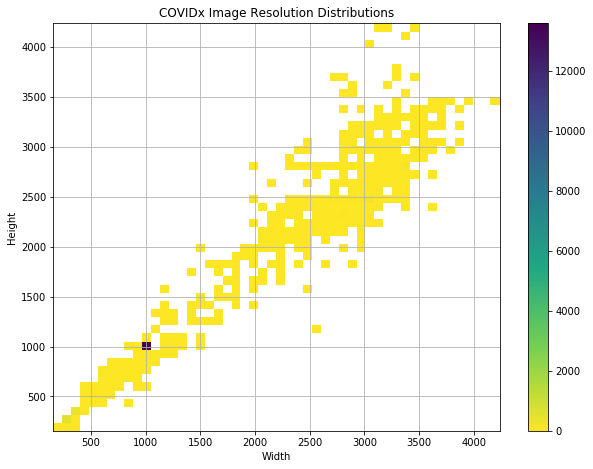

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#fde624'),
    (0.2, '#78d151'),
    (0.4, '#21a784'),
    (0.6, '#2a788e'),
    (0.8, '#404388'),
    (1, '#440053'),
], N=data.shape[0])

x = data['resolution_x'].astype(float).to_numpy()
y = data['resolution_y'].astype(float).to_numpy()

plt.figure(figsize=(10,7.5))

plt.title('COVIDx Image Resolution Distributions')
plt.xlabel('Width')
plt.ylabel('Height')

plt.hist2d(x, y, (50, 50), cmap=white_viridis)

plt.grid()
plt.colorbar()

plt.savefig('img.png')
#plt.show()


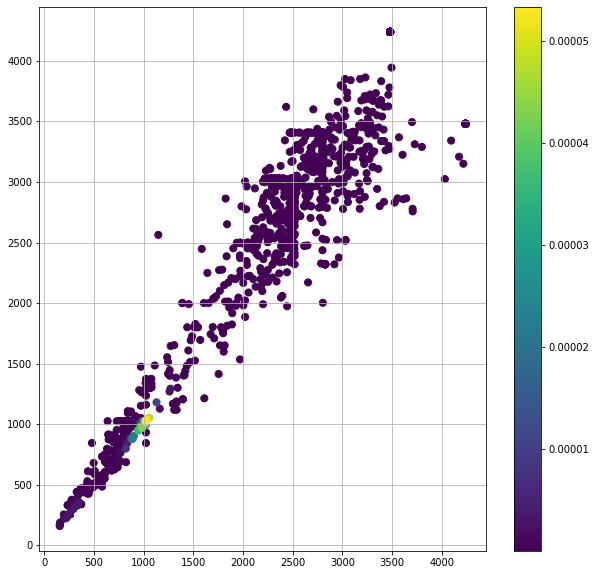

In [188]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = data['resolution_x'].astype(float).to_numpy()
y = data['resolution_y'].astype(float).to_numpy()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

#fig, ax = plt.subplots(figsize=(10,7.5))
plt.figure(figsize=(10,10))
#cax = ax.scatter(x, y, c=z, s=50)
plt.scatter(x, y, c=z, s=50)

ax.set_title('COVIDx Image Resolution Distributions')
ax.set_xlabel('Width')
ax.set_xlabel('Height')

#plt.colorbar(cax)
plt.colorbar()
plt.grid()
plt.show()

In [42]:
ehl = pd.DataFrame(columns=['id', 'name', 'class', 'source'], dtype=object)

In [43]:
ehl.head()

,id,name,class,source


In [44]:
def format_condition(cond):
    if cond == 'COVID-19':
        return 'COVID-19'
    elif cond == 'Pneumonia':
        return 'pneumonia'
    else:
        return 'normal'

In [49]:
dup = pd.read_csv('ehl_cohen_images.txt', header=None, names=['path'])
dup

,path
0,covid-19-pneumonia-22-day2-pa.png
1,extubation-8.jpg
2,covid-19-pneumonia-7-PA.jpg
3,67d668e570c242404ba82c7cbe2ca8f2-05be-0.jpg
4,nejmoa2001191_f5-PA.jpeg
...,...
97,1-s2.0-S1684118220300682-main.pdf-003-b1.png
98,fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.ori...
99,yxppt-2020-02-19_00-51-27_287214-day10.jpg
100,covid-19-pneumonia-24-day12.jpg


In [51]:
#ehl_imgs = os.listdir('ehl_data/train')
for split in ['train', 'test']:
    for ehl_dir in os.listdir('ehl_data/{}'.format(split)):
        if ehl_dir in ['COVID-19', 'Pneumonia', 'Normal']:
            path = 'ehl_data/{}/{}'.format(split, ehl_dir)
            images = os.listdir('ehl_data/{}/{}'.format(split, ehl_dir))
            for idx, image in enumerate(images):
                if image not in dup['path'].to_numpy():
                    path_to_image = os.path.join(path, image)
                    ehl = ehl.append({
                        'id': 'ehl_{}_{}_{}'.format(split, ehl_dir, idx),
                        'name': image.replace(" ", ""),
                        'class': format_condition(ehl_dir),
                        'source': 'ehl',
                        'split': split
                    }, ignore_index=True)

In [52]:
ehl.sample(10)

,id,name,class,source,split
1749,ehl_test_Normal_1246,patient04863-study1-view1_frontal.jpg,normal,ehl,test
2091,ehl_test_Normal_1588,patient00881-study1-view1_frontal.jpg,normal,ehl,test
1339,ehl_test_Normal_836,patient06635-study1-view1_frontal.jpg,normal,ehl,test
1986,ehl_test_Normal_1483,patient05581-study3-view1_frontal.jpg,normal,ehl,test
509,ehl_test_Normal_6,patient07575-study1-view1_frontal.jpg,normal,ehl,test
2183,ehl_test_Normal_1680,patient02376-study1-view1_frontal.jpg,normal,ehl,test
63,ehl_train_COVID-19_81,COVID-1912132020(85).jpg,COVID-19,ehl,train
1256,ehl_test_Normal_753,patient03760-study1-view2_frontal.jpg,normal,ehl,test
1946,ehl_test_Normal_1443,patient01400-study1-view1_frontal.jpg,normal,ehl,test
692,ehl_test_Normal_189,patient05840-study1-view1_frontal.jpg,normal,ehl,test


In [53]:
ehl_train = ehl[ehl['split'] == 'train'][['id', 'name', 'class', 'source']]
ehl_test = ehl[ehl['split'] == 'test'][['id', 'name', 'class', 'source']]

In [54]:
ehl_train.to_csv('labels/train_ehl.txt', sep=' ', index=False, header=False)
ehl_test.to_csv('labels/test_ehl.txt', sep=' ', index=False, header=False)

In [272]:
#ehl = pd.concat([ehl_train, ehl_test])
#ehl.sample(5)

In [55]:
ehl.groupby(['split', 'class']).agg({
    'id': 'count'
})

id
split class          
test  COVID-19     39
      normal     1700
      pneumonia    97
train COVID-19    148
      normal      198
      pneumonia    21

In [56]:
ehl.groupby(['class']).agg({
    'id': 'count'
})

,id
class,
COVID-19,187
normal,1898
pneumonia,118


In [60]:
ehl.groupby(['class']).agg({
    'id': 'count'
})

,id
class,
COVID-19,187
normal,1898
pneumonia,118


In [64]:
ehl.sample(5)

,id,name,class,source,split,resolutions
1511,ehl_test_Normal_1008,patient00488-study1-view1_frontal.jpg,normal,ehl,test,320 320
566,ehl_test_Normal_63,patient04998-study3-view1_frontal.jpg,normal,ehl,test,320 390
141,ehl_train_COVID-19_180,B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg,COVID-19,ehl,train,1648 2150
855,ehl_test_Normal_352,patient00807-study1-view1_frontal.jpg,normal,ehl,test,320 390
1789,ehl_test_Normal_1286,patient08298-study1-view1_frontal.jpg,normal,ehl,test,320 360


In [65]:
def format_condition(cond):
    if cond == 'COVID-19':
        return 'COVID-19'
    elif cond == 'pneumonia':
        return 'Pneumonia'
    else:
        return 'Normal'

def get_resolutions(image):
    img_path = os.path.join('data/{}'.format(image['split']), image['name'])
    try:
        img = cv2.imread(img_path)
        return "{} {}".format(img.shape[0], img.shape[1])
    except: print(img_path)

ehl['resolutions'] = ehl.apply(get_resolutions, axis=1)

In [69]:
ehl['resolution_x'] = ehl['resolutions'].apply(lambda x: x.split('\xa0')[1])
ehl['resolution_y'] = ehl['resolutions'].apply(lambda x: x.split('\xa0')[0])

In [70]:
ehl.sample(10)

,id,name,class,source,split,resolutions,resolution_x,resolution_y
299,ehl_train_Normal_130,NoFinding-patient52236-study1-view1_frontal.jpg,normal,ehl,train,320 389,389,320
2067,ehl_test_Normal_1564,patient04618-study1-view1_frontal.jpg,normal,ehl,test,320 320,320,320
644,ehl_test_Normal_141,patient07982-study13-view1_frontal.jpg,normal,ehl,test,320 320,320,320
578,ehl_test_Normal_75,patient07201-study1-view1_frontal.jpg,normal,ehl,test,321 320,320,321
1020,ehl_test_Normal_517,patient07908-study1-view1_frontal.jpg,normal,ehl,test,320 362,362,320
19,ehl_train_COVID-19_24,COVID-19_02132021(31).jpg,COVID-19,ehl,train,1403 1696,1696,1403
486,ehl_test_Pneumonia_80,patient14770-study1-view2_frontal.jpg,pneumonia,ehl,test,320 390,390,320
471,ehl_test_Pneumonia_65,patient16081-study20-view1_frontal.jpg,pneumonia,ehl,test,320 390,390,320
1952,ehl_test_Normal_1449,patient08585-study9-view1_frontal.jpg,normal,ehl,test,320 385,385,320
919,ehl_test_Normal_416,patient04081-study1-view1_frontal.jpg,normal,ehl,test,320 320,320,320


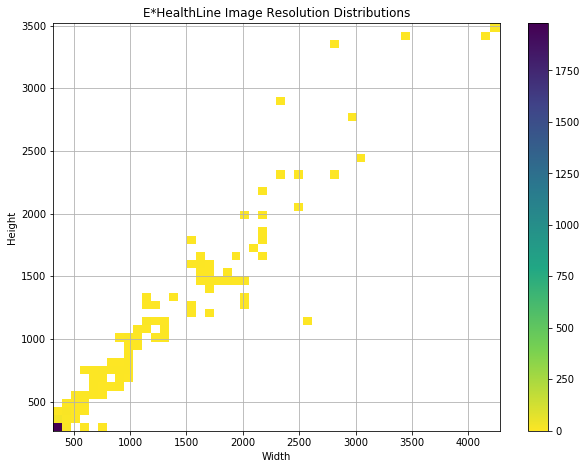

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#fde624'),
    (0.2, '#78d151'),
    (0.4, '#21a784'),
    (0.6, '#2a788e'),
    (0.8, '#404388'),
    (1, '#440053'),
], N=data.shape[0])

x = ehl['resolution_x'].astype(float).to_numpy()
y = ehl['resolution_y'].astype(float).to_numpy()

plt.figure(figsize=(10,7.5))

plt.title('E*HealthLine Image Resolution Distributions')
plt.xlabel('Width')
plt.ylabel('Height')

plt.hist2d(x, y, (50, 50), cmap=white_viridis)

plt.grid()
plt.colorbar()

plt.savefig('ehl_img.png')
plt.show()

In [72]:
ehl.groupby('resolutions').agg({
    'id': 'count'
}).sort_values(by='id', ascending=False)

,id
resolutions,
320 390,843
320 320,473
320 389,173
320 369,103
320 371,54
...,...
320 356,1
320 364,1
320 366,1


In [73]:
ehl.groupby('resolutions').agg({
    'id': 'count'
})['id'].sum()

2203

In [ ]:
"""
ehl = pd.DataFrame(columns=['id', 'name', 'class', 'source'], dtype=object)

def format_condition(cond):
    if cond == 'COVID-19':
        return 'COVID-19'
    elif cond == 'Pneumonia':
        return 'pneumonia'
    else:
        return 'normal'

for split in ['train', 'test']:
    for ehl_dir in os.listdir('ehl_data/{}'.format(split)):
        if ehl_dir in ['COVID-19', 'Pneumonia', 'Normal']:
            path = 'ehl_data/{}/{}'.format(split, ehl_dir)
            images = os.listdir('ehl_data/{}/{}'.format(split, ehl_dir))
            for idx, image in enumerate(images):
                path_to_image = os.path.join(path, image)
                ehl = ehl.append({
                    'id': 'ehl_{}_{}_{}'.format(split, ehl_dir, idx),
                    'name': image,
                    'class': format_condition(ehl_dir),
                    'source': 'ehl',
                    'split': split
                }, ignore_index=True)
                
ehl_train = ehl[ehl['split'] == 'train'][['id', 'name', 'class', 'source']]
ehl_test = ehl[ehl['split'] == 'test'][['id', 'name', 'class', 'source']]

ehl_train.to_csv('labels/train_ehl.txt', sep=' ', index=False, header=False)
ehl_test.to_csv('labels/test_ehl.txt', sep=' ', index=False, header=False)
"""

In [58]:
import shutil
import os

for split in ['train', 'test']:
    for ehl_dir in os.listdir('ehl_data/{}'.format(split)):
        path = 'ehl_data/{}/{}'.format(split, ehl_dir)
        if ehl_dir in ['COVID-19', 'Pneumonia', 'Normal']:
            images = os.listdir('ehl_data/{}/{}'.format(split, ehl_dir))
            for idx, image in enumerate(images):
                path_to_image = os.path.join(path, image)
                shutil.copy(path_to_image,os.path.join('data/{}'.format(split), image))
                os.rename(os.path.join('data/{}'.format(split), image), os.path.join('data/{}'.format(split), image.replace(" ", "")))

In [3]:
data = pd.read_csv('labels/train_COVIDx8A.txt', sep="GGGG", header=None)
data.columns = ["line"]
data['line'] = data['line'].str.replace("\"", "")
data['split'] = 'train'

data1 = pd.read_csv('labels/test_COVIDx8A.txt', sep="GGGG", header=None)
data1.columns = ["line"]
data1['line'] = data1['line'].str.replace("\"", "")
data1['split'] = 'test'

data2 = pd.read_csv('labels/train_ehl.txt', sep="GGGG", header=None)
data2.columns = ["line"]
data2['line'] = data2['line'].str.replace("\"", "")
data2['split'] = 'train'

data3 = pd.read_csv('labels/test_ehl.txt', sep="GGGG", header=None)
data3.columns = ["line"]
data3['line'] = data3['line'].str.replace("\"", "")
data3['split'] = 'test'

data = pd.concat([data, data1, data2, data3])

data['dataset'] = data['line'].apply(lambda x: x.split(' ')[-1])
data['class'] = data['line'].apply(lambda x: x.split(' ')[-2])
data['name'] = data['line'].apply(lambda x: x.split(' ')[-3])

data.sample(10)

/Users/gisli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/gisli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Users/gisli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine

,line,split,dataset,class,name
5301,7bbdf2ff-a866-4b93-b201-a47d03337b63 7bbdf2ff-...,train,rsna,normal,7bbdf2ff-a866-4b93-b201-a47d03337b63.png
110,SITE2-000237 MIDRC-RICORD-1C-SITE2-000237-5251...,test,ricord,COVID-19,MIDRC-RICORD-1C-SITE2-000237-52517-0.png
6081,90851418-d975-4858-9396-2a03b31ab76c 90851418-...,train,rsna,normal,90851418-d975-4858-9396-2a03b31ab76c.png
10066,268e70e8-ae02-4926-90fb-f458452c53d2 268e70e8-...,train,rsna,normal,268e70e8-ae02-4926-90fb-f458452c53d2.png
9047,e5eef69e-7f0b-4f83-b13c-c14fabf96f98 e5eef69e-...,train,rsna,normal,e5eef69e-7f0b-4f83-b13c-c14fabf96f98.png
5155,774e0a41-b033-43da-8d57-db5baf9605ed 774e0a41-...,train,rsna,normal,774e0a41-b033-43da-8d57-db5baf9605ed.png
13700,b31c76eb-b9ee-4c98-88f7-b8c04d7aa33f b31c76eb-...,train,rsna,pneumonia,b31c76eb-b9ee-4c98-88f7-b8c04d7aa33f.png
12671,8c2f692c-da4d-41d8-9e6d-c558cb5ac6e0 8c2f692c-...,train,rsna,pneumonia,8c2f692c-da4d-41d8-9e6d-c558cb5ac6e0.png
4707,6a2cac4c-5519-4411-a401-56db23231008 6a2cac4c-...,train,rsna,normal,6a2cac4c-5519-4411-a401-56db23231008.png
10491,15741dba-9bd7-469c-acfc-fb563112ee39 15741dba-...,train,rsna,pneumonia,15741dba-9bd7-469c-acfc-fb563112ee39.png


In [4]:
data[data['name'].str.contains('5e7c1b8')]

,line,split,dataset,class,name
3,ehl_train_COVID-19_3 figure1-5e7c1b8d98c29ab00...,train,ehl,COVID-19,figure1-5e7c1b8d98c29ab001275405-98.jpeg
40,ehl_train_COVID-19_40 figure1-5e7c1b8d98c29ab0...,train,ehl,COVID-19,figure1-5e7c1b8d98c29ab001275405-98-later.jpeg


In [5]:
data[(data['dataset'] == 'fig1') & (data['class'] == 'COVID-19')]

,line,split,dataset,class,name
322,COVID-00001 COVID-00001.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00001.jpg
323,COVID-00004 COVID-00004.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00004.jpg
324,COVID-00006 COVID-00006.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00006.jpg
325,COVID-00008 COVID-00008.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00008.jpg
326,COVID-00009 COVID-00009.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00009.jpg
327,COVID-00011 COVID-00011.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00011.jpg
328,COVID-00012 COVID-00012.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00012.jpg
329,COVID-00015a COVID-00015a.png COVID-19 fig1,train,fig1,COVID-19,COVID-00015a.png
330,COVID-00015b COVID-00015b.png COVID-19 fig1,train,fig1,COVID-19,COVID-00015b.png
331,COVID-00016 COVID-00016.jpg COVID-19 fig1,train,fig1,COVID-19,COVID-00016.jpg


In [6]:
data[(data['dataset'] == 'ehl') & (data['class'] == 'COVID-19') & (data['name'].str.contains('figure1'))]

,line,split,dataset,class,name
3,ehl_train_COVID-19_3 figure1-5e7c1b8d98c29ab00...,train,ehl,COVID-19,figure1-5e7c1b8d98c29ab001275405-98.jpeg
23,ehl_train_COVID-19_23 figure1-5e75d0940b71e1b7...,train,ehl,COVID-19,figure1-5e75d0940b71e1b702629659-98-right.jpeg
40,ehl_train_COVID-19_40 figure1-5e7c1b8d98c29ab0...,train,ehl,COVID-19,figure1-5e7c1b8d98c29ab001275405-98-later.jpeg
64,ehl_train_COVID-19_64 figure1-5e71be566aa8714a...,train,ehl,COVID-19,figure1-5e71be566aa8714a04de3386-98-left.jpeg
7,ehl_test_COVID-19_7 figure1-5e73d7ae897e27ff06...,test,ehl,COVID-19,figure1-5e73d7ae897e27ff066a30cb-98.jpeg


In [7]:
data3.sample(5)

,line,split
436,ehl_test_Normal_239 patient03970-study1-view1_...,test
1442,ehl_test_Normal_1245 patient05995-study9-view1...,test
1486,ehl_test_Normal_1289 patient03860-study1-view1...,test
827,ehl_test_Normal_630 patient06928-study1-view1_...,test
1729,ehl_test_Normal_1532 patient01232-study1-view1...,test


In [8]:
data.groupby(['class']).agg({
    'line': 'count'
})

,line
class,
COVID-19,2542
normal,9964
pneumonia,5693


In [9]:
data[data['name'] == 'covid-19-pneumonia-22-day2-pa.png']

,line,split,dataset,class,name
152,164 covid-19-pneumonia-22-day2-pa.png COVID-19...,train,cohen,COVID-19,covid-19-pneumonia-22-day2-pa.png
0,ehl_train_COVID-19_0 covid-19-pneumonia-22-day...,train,ehl,COVID-19,covid-19-pneumonia-22-day2-pa.png


In [10]:
data[data['name'] == 'NoFinding-patient23220-study2-view1_frontal.jpg']

,line,split,dataset,class,name
105,ehl_train_Normal_0 NoFinding-patient23220-stud...,train,ehl,normal,NoFinding-patient23220-study2-view1_frontal.jpg


In [11]:
data[data['name'].str.contains('patient23220')]

,line,split,dataset,class,name
105,ehl_train_Normal_0 NoFinding-patient23220-stud...,train,ehl,normal,NoFinding-patient23220-study2-view1_frontal.jpg


In [13]:
import matplotlib.pyplot as plt
plt.imshow(cv2.imread('data/train/covid-19-pneumonia-22-day2-pa.png'))
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
i = cv2.imread('data/train/covid-19-pneumonia-22-day2-pa.png')

In [15]:
def format_condition(cond):
    if cond == 'COVID-19':
        return 'COVID-19'
    elif cond == 'pneumonia':
        return 'Pneumonia'
    else:
        return 'Normal'

def get_resolutions(image):
    img_path = os.path.join('data/{}'.format(image['split']), image['name'])
    try:
        img = cv2.imread(img_path)
        return "{} {}".format(img.shape[0], img.shape[1])
    except:
        print(img_path)


data['resolutions'] = data.apply(get_resolutions, axis=1)

In [16]:
data['resolution_x'] = data['resolutions'].apply(lambda x: x.split('\xa0')[0])
data['resolution_y'] = data['resolutions'].apply(lambda x: x.split('\xa0')[1])

In [17]:
data.sample(20)

,line,split,dataset,class,name,resolutions,resolution_x,resolution_y
7020,a9be2ad9-4a05-44bd-b5eb-a0938bc06363 a9be2ad9-...,train,rsna,normal,a9be2ad9-4a05-44bd-b5eb-a0938bc06363.png,1024 1024,1024,1024
8835,e0a86d60-2d8c-4e72-acd8-ccf7924bdefa e0a86d60-...,train,rsna,normal,e0a86d60-2d8c-4e72-acd8-ccf7924bdefa.png,1024 1024,1024,1024
9879,ffe16061-b19f-4333-8a03-b41aab42b47d ffe16061-...,train,rsna,normal,ffe16061-b19f-4333-8a03-b41aab42b47d.png,1024 1024,1024,1024
15336,0f0bc2f0-761b-4d4e-a0ae-a6f5a628ab1c 0f0bc2f0-...,train,rsna,pneumonia,0f0bc2f0-761b-4d4e-a0ae-a6f5a628ab1c.png,1024 1024,1024,1024
8893,e23c79f5-4c5d-4682-b770-1b33651426aa e23c79f5-...,train,rsna,normal,e23c79f5-4c5d-4682-b770-1b33651426aa.png,1024 1024,1024,1024
6609,9deec23f-8bc9-4957-8b3e-be5c7abf2e87 9deec23f-...,train,rsna,normal,9deec23f-8bc9-4957-8b3e-be5c7abf2e87.png,1024 1024,1024,1024
207,295 11547_2020_1200_Fig2_HTML-a.png COVID-19 c...,train,cohen,COVID-19,11547_2020_1200_Fig2_HTML-a.png,839 963,839,963
9167,e9169397-56f6-4c4e-8014-b67cba6f799f e9169397-...,train,rsna,normal,e9169397-56f6-4c4e-8014-b67cba6f799f.png,1024 1024,1024,1024
12833,945a3e8f-a300-44b2-bf25-b8fdc63e0c7e 945a3e8f-...,train,rsna,pneumonia,945a3e8f-a300-44b2-bf25-b8fdc63e0c7e.png,1024 1024,1024,1024
2179,SITE2-000252 MIDRC-RICORD-1C-SITE2-000252-9890...,train,ricord,COVID-19,MIDRC-RICORD-1C-SITE2-000252-98900-0.png,3480 4240,3480,4240


In [20]:
data[(data['dataset'] == 'ehl') & (data['class'] == 'COVID-19')]['class'].value_counts()

COVID-19    184
Name: class, dtype: int64

In [21]:
data[data['name'].duplicated()]

,line,split,dataset,class,name,resolutions,resolution_x,resolution_y
0,ehl_train_COVID-19_0 covid-19-pneumonia-22-day...,train,ehl,COVID-19,covid-19-pneumonia-22-day2-pa.png,1395 1205,1395,1205
2,ehl_train_COVID-19_2 extubation-8.jpg COVID-19...,train,ehl,COVID-19,extubation-8.jpg,367 442,367,442
6,ehl_train_COVID-19_6 covid-19-pneumonia-7-PA.j...,train,ehl,COVID-19,covid-19-pneumonia-7-PA.jpg,2840 2972,2840,2972
7,ehl_train_COVID-19_7 67d668e570c242404ba82c7cb...,train,ehl,COVID-19,67d668e570c242404ba82c7cbe2ca8f2-05be-0.jpg,1024 1160,1024,1160
8,ehl_train_COVID-19_8 nejmoa2001191_f5-PA.jpeg ...,train,ehl,COVID-19,nejmoa2001191_f5-PA.jpeg,841 1107,841,1107
...,...,...,...,...,...,...,...,...
95,ehl_test_COVID-19_95 1-s2.0-S1684118220300682-...,test,ehl,COVID-19,1-s2.0-S1684118220300682-main.pdf-003-b1.png,391 436,391,436
96,ehl_test_COVID-19_96 fff49165-b22d-4bb4-b9d1-d...,test,ehl,COVID-19,fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.ori...,1013 1024,1013,1024
97,ehl_test_COVID-19_97 yxppt-2020-02-19_00-51-27...,test,ehl,COVID-19,yxppt-2020-02-19_00-51-27_287214-day10.jpg,325 333,325,333
98,ehl_test_COVID-19_98 covid-19-pneumonia-24-day...,test,ehl,COVID-19,covid-19-pneumonia-24-day12.jpg,1969 2221,1969,2221


In [23]:
data[data['name'] == 'covid-19-pneumonia-22-day2-pa.png']

,line,split,dataset,class,name,resolutions,resolution_x,resolution_y
152,164 covid-19-pneumonia-22-day2-pa.png COVID-19...,train,cohen,COVID-19,covid-19-pneumonia-22-day2-pa.png,1395 1205,1395,1205
0,ehl_train_COVID-19_0 covid-19-pneumonia-22-day...,train,ehl,COVID-19,covid-19-pneumonia-22-day2-pa.png,1395 1205,1395,1205


In [432]:
data[data['name'].duplicated()][['name', 'split', 'class']].to_excel('duplicate_images_ehl.xlsx', index=False)

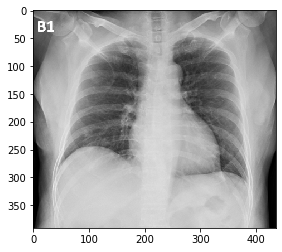

In [433]:
plt.imshow(cv2.imread('data/train/1-s2.0-S1684118220300682-main.pdf-003-b1.png'))

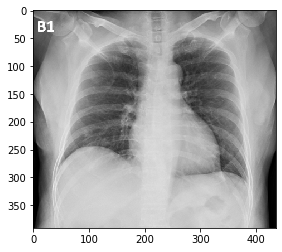

In [434]:
plt.imshow(cv2.imread('data/test/1-s2.0-S1684118220300682-main.pdf-003-b1.png'))

In [438]:
np.array_equal(cv2.imread('data/test/1-s2.0-S1684118220300682-main.pdf-003-b1.png'), cv2.imread('data/train/1-s2.0-S1684118220300682-main.pdf-003-b1.png'))

True